In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house_data.csv to house_data.csv


Dataset Name: House Price Prediction Dataset
https://drive.google.com/file/d/1aNw7f2sO16PlhqxdOeFBqwWDjjE1XrhT/view?usp=sharing

Business Scenario
A real estate analytics company helps customers estimate the market value of residential properties.

Property prices do not always increase smoothly:

Prices jump based on location

Amenities create sudden price differences

Market behaviour is noisy and inconsistent

The company wants a reliable pricing system that can:

Handle non-linear relationships

Work well with noisy real-world data

Provide stable predictions for unseen properties

You are hired as a Data Analyst to build this pricing solution.

1.Load the dataset and examine the available property attributes.

2.Identify input features that may influence house prices (e.g., size, bedrooms, bathrooms, location-related fields).

3.Build a regression model that predicts house price based on the selected features.

4.Train the model using historical property data.Predict prices for unseen property records.

5.Evaluate the model performance using:

Mean Squared Error (MSE)
R² score


6.Analyze the prediction behavior

7.Build an alternative regression model that combines predictions from multiple rule-based models.

8.Compare the two models based on:

Does the model produce smooth or step-wise predictions?

Does it react strongly to small changes in input?

Stability of predictions

Sensitivity to noise

Performance on test data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('house_data.csv')
print("Dataset preview")
df.head()

Dataset preview


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
print("Dataset shape")
df.shape

Dataset shape


(4600, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "floors", "waterfront", "view", "condition",
    "sqft_above", "sqft_basement", "yr_built", "yr_renovated"
]

X = df[features]
y = df["price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,max_depth=15,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(max_depth=15,random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

In [ ]:
y_pred_dt=dt.predict(X_test)

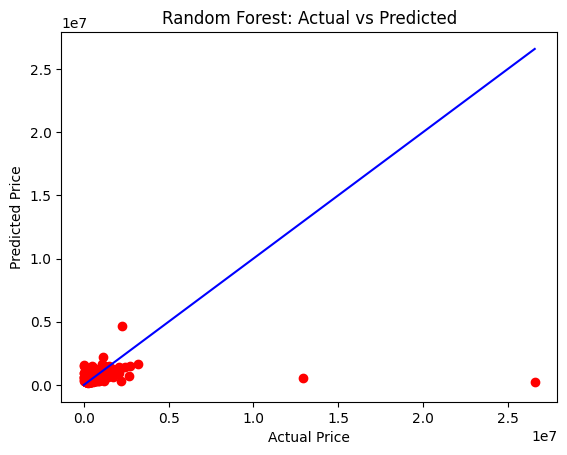

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred_rf,color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color="blue")
plt.show()

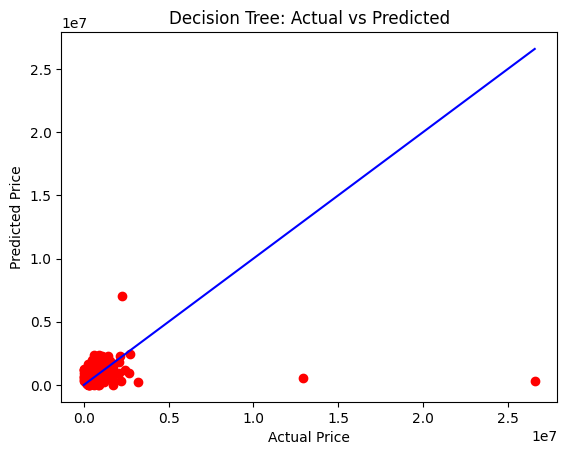

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_dt,color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color="blue")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Random Forest :")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

print("\nDecision Tree : ")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

Random Forest :
MSE: 991899514755.4277
R2 Score: 0.027402976539724677

Decision Tree : 
MSE: 1049529485730.9861
R2 Score: -0.02910550783709298


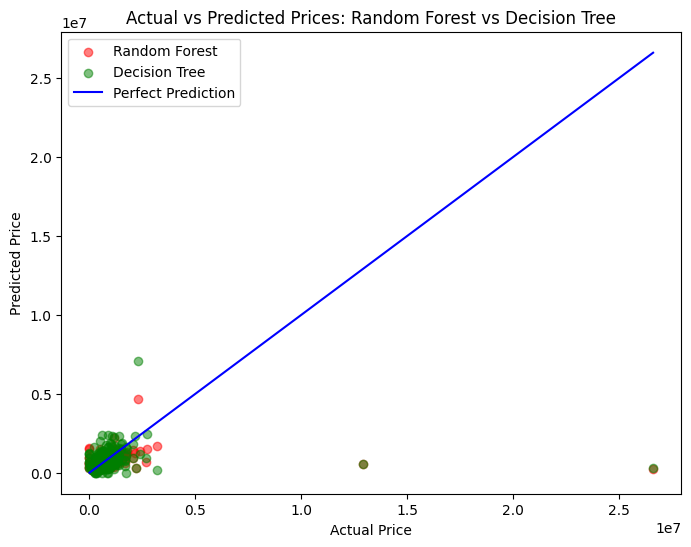

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color="red", alpha=0.5, label="Random Forest")
plt.scatter(y_test, y_pred_dt, color="green", alpha=0.5, label="Decision Tree")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices: Random Forest vs Decision Tree")
plt.legend()
plt.show()